Exercises

Do your work for this exercise in a jupyter notebook named feature_engineering within the regression-exercises repo. Add, commit, and push your work.

1. Load the tips dataset.
* Create a column named price_per_person. This should be the total bill divided by the party size.

* Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount?

* Use select k best to select the top 2 features for predicting tip amount. What are they?

* Use recursive feature elimination to select the top 2 features for tip amount. What are they?

* Why do you think select k best and recursive feature elimination might give different answers for the top features? Does this change as you change the number of features you are selecting?

2. Write a function named select_kbest that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the SelectKBest class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

3. Write a function named rfe that takes in the predictors, the target, and the number of features to select. It should return the top k features based on the RFE class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

4. Load the swiss dataset and use all the other features to predict Fertility. Find the top 3 features using both select k best and recursive feature elimination (use the functions you just built to help you out).

In [1]:
import pandas as pd
import numpy as np
from pydataset import data

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import math
from sklearn.preprocessing import MinMaxScaler
import env
import wrangle
from wrangle import get_zillow_data
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import explained_variance_score

In [2]:
#Loaded tips dataset
df = pd.read_csv("tips.csv")

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
#Created the price per person column
df['price_per_person'] = (df.total_bill / df.size)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    object 
 3   smoker            244 non-null    object 
 4   day               244 non-null    object 
 5   time              244 non-null    object 
 6   size              244 non-null    int64  
 7   price_per_person  244 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 15.4+ KB


In [6]:
df['sex']=LabelEncoder().fit_transform(df['sex'])
df['smoker']=LabelEncoder().fit_transform(df['smoker'])
df['day']=LabelEncoder().fit_transform(df['day'])
df['time']=LabelEncoder().fit_transform(df['time'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    int64  
 3   smoker            244 non-null    int64  
 4   day               244 non-null    int64  
 5   time              244 non-null    int64  
 6   size              244 non-null    int64  
 7   price_per_person  244 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 15.4 KB


In [8]:
#Split the data for exploration using train dataset
from wrangle import train_test_split
# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train. 

train, test = train_test_split(df, random_state=123)
train, validate = train_test_split(train, random_state=123)


In [9]:
train.shape, test.shape, validate.shape

((137, 8), (61, 8), (46, 8))

Text(0.5, 1.0, 'Scaled')

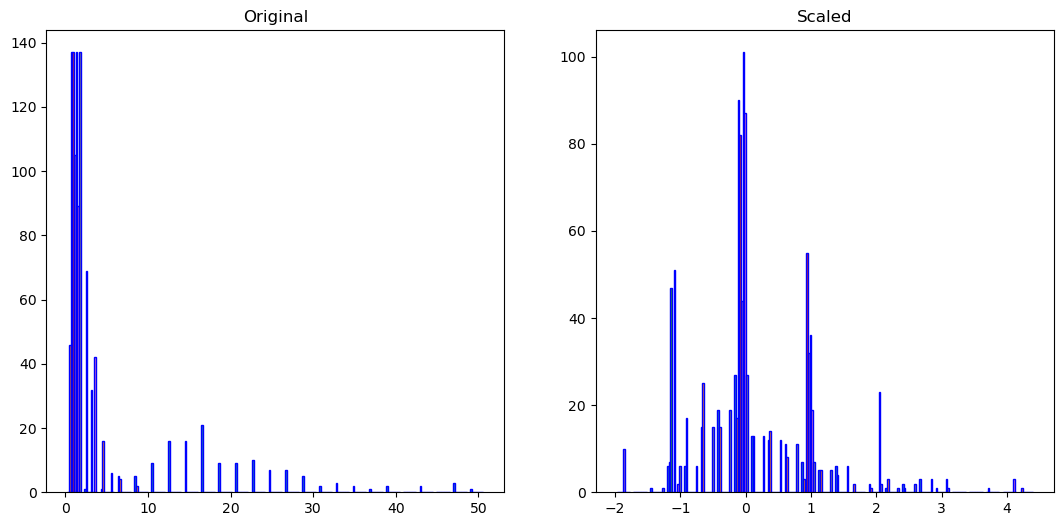

In [10]:
scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(train)

x_train_scaled = scaler.transform(train)
x_validate_scaled = scaler.transform(validate)
x_test_scaled = scaler.transform(test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='blue')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='blue')
plt.title('Scaled')

In [11]:
y_train = train['tip']

In [12]:
y_train

241     2.00
163     2.00
69      2.09
180     3.68
208     2.03
74      2.20
113     2.55
134     3.25
218     1.44
206     3.41
92      1.00
147     1.63
148     1.73
211     5.16
183     6.50
224     1.58
99      1.50
34      3.27
115     3.50
138     2.00
35      3.60
170    10.00
8       1.96
111     1.00
70      1.97
240     2.00
228     2.72
54      4.34
155     5.14
175     3.11
84      2.03
28      4.30
29      3.00
47      6.00
161     2.50
233     1.47
41      2.54
49      3.00
40      2.24
137     2.00
0       1.01
98      3.00
217     1.50
223     3.00
7       3.12
15      3.92
94      3.25
73      5.00
105     1.64
150     2.50
212     9.00
201     2.01
189     4.00
214     6.50
57      1.50
101     3.00
220     2.20
156     5.00
125     4.20
188     3.50
199     2.00
72      3.14
6       2.00
146     1.36
171     3.16
22      2.23
179     3.55
195     1.44
229     2.88
60      3.21
160     3.50
140     3.50
108     3.76
237     1.17
153     2.00
216     3.00
68      2.01

In [13]:
train = train.drop(columns='tip')

In [14]:
train

,total_bill,sex,smoker,day,time,size,price_per_person
241,22.67,1,1,1,0,2,0.013273
163,13.81,1,0,2,0,2,0.008085
69,15.01,1,1,1,0,2,0.008788
180,34.65,1,1,2,0,4,0.020287
208,24.27,1,1,1,0,2,0.014210
74,14.73,0,0,1,0,2,0.008624
113,23.95,1,0,2,0,2,0.014022
134,18.26,0,0,3,1,2,0.010691
218,7.74,1,1,1,0,2,0.004532
206,26.59,1,1,1,0,3,0.015568


#Which features do you think would be most important for predicting the tip amount?
total_bill, and size of party

In [15]:
x_train_scaled=pd.DataFrame(x_train_scaled)
x_train_scaled = x_train_scaled.drop(columns=0)

In [16]:
#Use select k best to select the top 2 features for predicting tip amount. What are they?
#Price per person and Total_Bill

from sklearn.feature_selection import SelectKBest, f_regression

f_selector = SelectKBest(f_regression, k=2)
f_selector.fit(x_train_scaled, y_train)


SelectKBest(k=2, score_func=<function f_regression at 0x16d1d5af0>)

In [17]:
X_reduced = f_selector.transform(x_train_scaled)

print(x_train_scaled.shape)
print(X_reduced.shape)


(137, 7)
(137, 2)


In [18]:
#simplified way of using SelectKBest
X_reduced2 = SelectKBest(f_regression, k=2).fit_transform(x_train_scaled, y_train)
print(X_reduced2.shape)


(137, 2)


In [19]:
X_reduced2 = pd.DataFrame(X_reduced2)

In [20]:
f_support = f_selector.get_support()

print(f_support) 


[ True False False False False False  True]


In [21]:
feature_mask = f_selector.get_support()

In [22]:
f_feature = [x_train_scaled.columns.values[i] for i in range (len(feature_mask)) if feature_mask[i]==True]
print(str(len(f_feature)), 'selected features')
print(f_feature)

2 selected features
[1, 7]


In [23]:
train

,total_bill,sex,smoker,day,time,size,price_per_person
241,22.67,1,1,1,0,2,0.013273
163,13.81,1,0,2,0,2,0.008085
69,15.01,1,1,1,0,2,0.008788
180,34.65,1,1,2,0,4,0.020287
208,24.27,1,1,1,0,2,0.014210
74,14.73,0,0,1,0,2,0.008624
113,23.95,1,0,2,0,2,0.014022
134,18.26,0,0,3,1,2,0.010691
218,7.74,1,1,1,0,2,0.004532
206,26.59,1,1,1,0,3,0.015568


Use recursive feature elimination to select the top 2 features for tip amount. What are they?
total bill & price per person

In [24]:

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


In [25]:
lm = LinearRegression()


In [26]:
rfe = RFE(lm, n_features_to_select=2)


In [27]:
# Transforming data using RFE
X_rfe = rfe.fit_transform(x_train_scaled,y_train)  


In [28]:
#Fitting the data to model
lm.fit(X_rfe,y_train)


LinearRegression()

In [29]:
mask = rfe.support_


In [30]:
rfe_features = x_train_scaled.loc[:,mask].columns.tolist()


In [31]:
rfe_features = x_train_scaled.loc[:,mask].columns.tolist()


In [32]:
print(str(len(rfe_features)), 'selected features')
print(rfe_features)


2 selected features
[1, 7]


Why do you think select k best and recursive feature elimination might give different answers for the top features? Does this change as you change the number of features you are selecting?

* If there is close correlation, yes because more features provide more variables of correlation

Write a function named select_kbest that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the SelectKBest class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [33]:
def select_kbest(x_train_scaled, y_train, k=2):
    X_reduced2 = SelectKBest(f_regression, k=k).fit_transform(x_train_scaled, y_train)
    f_support = f_selector.get_support()
    feature_mask = f_selector.get_support()
    f_feature = [x_train_scaled.columns.values[i] for i in range (len(feature_mask)) if feature_mask[i]==True]
    print(str(len(f_feature)), 'selected features')
    print(f_feature)


In [34]:
select_kbest(x_train_scaled, y_train, k=2)

2 selected features
[1, 7]


Write a function named rfe that takes in the predictors, the target, and the number of features to select. It should return the top k features based on the RFE class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [35]:
def rfe(x_train_scaled, y_train, k=2):
    lm = LinearRegression()
    rfe = RFE(lm, n_features_to_select=k)
    # Transforming data using RFE
    X_rfe = rfe.fit_transform(x_train_scaled,y_train)
    #Fitting the data to model
    lm.fit(X_rfe,y_train)
    mask = rfe.support_
    rfe_features = x_train_scaled.loc[:,mask].columns.tolist()
    print(str(len(rfe_features)), 'selected features')
    print(rfe_features)



In [36]:
rfe(x_train_scaled, y_train, k=2)

2 selected features
[1, 7]


Load the swiss dataset and use all the other features to predict Fertility. Find the top 3 features using both select k best and recursive feature elimination (use the functions you just built to help you out).

In [37]:
df1 = data('swiss')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [38]:
#Split the data for exploration using train dataset
from wrangle import train_test_split
# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train. 

train, test = train_test_split(df1, random_state=123)
train, validate = train_test_split(train, random_state=123)


In [39]:
train.shape, test.shape, validate.shape

((26, 6), (12, 6), (9, 6))

In [40]:
y_train = train['Fertility']
y_train

Rive Droite     44.7
Sierre          92.2
La Chauxdfnd    65.7
Martigwy        70.5
Courtelary      80.2
Yverdon         65.4
Monthey         79.4
Moudon          65.0
Le Locle        72.7
Sion            79.3
Payerne         74.2
Conthey         75.5
Franches-Mnt    92.5
Morges          65.5
Grandson        71.7
Vevey           58.3
Avenches        68.9
Aubonne         66.9
St Maurice      65.0
Herens          77.3
Nyone           56.6
Rive Gauche     42.8
Cossonay        61.7
Neuveville      76.9
Lavaux          65.1
Oron            72.5
Name: Fertility, dtype: float64

Text(0.5, 1.0, 'Scaled')

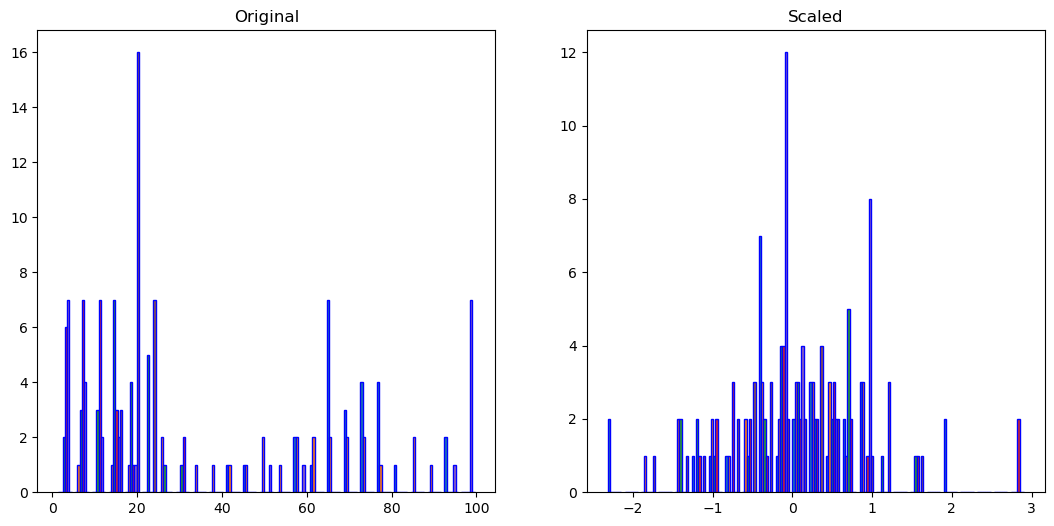

In [41]:
scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(train)

x_train_scaled = scaler.transform(train)
x_validate_scaled = scaler.transform(validate)
x_test_scaled = scaler.transform(test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='blue')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='blue')
plt.title('Scaled')

In [42]:
x_train_scaled = pd.DataFrame(x_train_scaled)

In [43]:
def rfe(x_train_scaled, y_train, k=3):
    lm = LinearRegression()
    rfe = RFE(lm, n_features_to_select=3)
    # Transforming data using RFE
    X_rfe = rfe.fit_transform(x_train_scaled,y_train)
    #Fitting the data to model
    lm.fit(X_rfe,y_train)
    mask = rfe.support_
    rfe_features = x_train_scaled.loc[:,mask].columns.tolist()
    print(str(len(rfe_features)), 'selected features')
    print(rfe_features)


In [44]:
rfe(x_train_scaled, y_train, k=3)

3 selected features
[0, 2, 5]


In [45]:
def select_kbest(x_train_scaled, y_train, k=2):
    X_reduced2 = SelectKBest(f_regression, k=k).fit_transform(x_train_scaled, y_train)
    f_support = f_selector.get_support()
    feature_mask = f_selector.get_support()
    f_feature = [x_train_scaled.columns.values[i] for i in range (len(feature_mask)) if feature_mask[i]==True]
    print(str(len(f_feature)), 'selected features')
    print(f_feature)


In [46]:
select_kbest(x_train_scaled, y_train, k=2)

IndexError: index 6 is out of bounds for axis 0 with size 6